<a href="https://colab.research.google.com/github/danishanis/Salary_Prediction_Portfolio/blob/master/SalaryPredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Predictions Based on Job Descriptions


**Author - Danish Anis**

**Contact - danishanis10@hotmail.com**

# Part 1 - DEFINE

## ---- 1 Define the problem ----

Predicting the salary for a job position is crucial for a business' HR & talent function for optimizing compensation strategy and talent retention in a highly competetive labour market. The aim of this project is to build a salary prediction model for existing and future job seekers by examining an existing dataset of job postings.

The analysis is aimed at explaining every step of the process from defining the problem, discovering dataset, developing model and deploying into production. The model applies data transformation and machine learning on features such as work experience, Job Type, Majors, Industry Type, Degree and Miles from metropolis. The final aim is to predict salary for a job posting based on these available features.

The data provided to us has been split in training and testing sets. The files included are training data (*train_features_df*), testing data (*test_features_df*) and a Target set (*train_salaries_df*) containing dependent salary feature.

The dataset includes available features or labelled columns for analysis as follows:


*   **Job ID/jobId** : Given Job ID for the role 
*   **Company ID** : Company ID for the respective Job ID advertised
*   **Degree** : Applicant's qualification/degree 
*   **Major** : Degree Specialization 
*   **Industry** : Job ID's categorized industry such as Oil, Auto, Health, Finance etc.
*   **Experience (Years)** : Requried Experience for the role
*   **Miles from Metropolis** : Distance of the job location in miles from the nearest metropolitan city
*   **salary** : In x1000 dollars of the respective Job ID 




In [192]:
#import your libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib as matplot
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib



/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Part 2 - DISCOVER

## ---- 2 Load the data ----

In [0]:
#loading data into a pandas dataframe

url1 = 'https://raw.githubusercontent.com/danishanis/Salary_Prediction_Portfolio/master/train_features.csv'
train_features_df = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/danishanis/Salary_Prediction_Portfolio/master/test_features.csv'
test_features_df = pd.read_csv(url2)

url3 = 'https://raw.githubusercontent.com/danishanis/Salary_Prediction_Portfolio/master/train_salaries.csv'
train_salaries_df = pd.read_csv(url3)

## ---- 3 Clean the data ----

In [0]:
#Renaming columns for ease of exploration

train_features_df.rename(columns={'jobId':'Job ID', 'companyId':'Company ID', 
                                  'jobType':'Job Type','degree':'Degree','major':'Major',
                                  'industry':'Industry','yearsExperience':'Experience (Years)',
                                 'milesFromMetropolis':'Miles from Metropolis'}, inplace = True)

test_features_df.rename(columns={'jobId':'Job ID', 'companyId':'Company ID', 
                                  'jobType':'Job Type','degree':'Degree','major':'Major',
                                  'industry':'Industry','yearsExperience':'Experience (Years)',
                                 'milesFromMetropolis':'Miles from Metropolis'}, inplace = True)

train_salaries_df.rename(columns={'jobId':'Job ID','salary':'Salary'}, inplace = True)

###Verifying that the data is loaded alright by looking at its length, shape and checking values.

In [106]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
Job ID                   1000000 non-null object
Company ID               1000000 non-null object
Job Type                 1000000 non-null object
Degree                   1000000 non-null object
Major                    1000000 non-null object
Industry                 1000000 non-null object
Experience (Years)       1000000 non-null int64
Miles from Metropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [107]:
print(train_features_df.shape)
print(test_features_df.shape)
print(train_salaries_df.shape)

(1000000, 8)
(1000000, 8)
(1000000, 2)


Both train and test datasets have the same lengths and data types

In [108]:
train_features_df.head()

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [109]:
train_salaries_df.head()

,Job ID,Salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [110]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
Job ID    1000000 non-null object
Salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


The dataset 'train_salaries_df' has our dependent target variable, Salary info (to be predicted) along with the Job ID. This is the same Job ID as we have in the previous training and testing datasets. Therefore, train_salaries_df is better to be used for testing the built model for its accuracy.

For the sake of ease, the Job ID column in target set shall be merged with the training set later. 

###Checking for and removing any missing values.

In [111]:
train_features_df.isnull().sum()

Job ID                   0
Company ID               0
Job Type                 0
Degree                   0
Major                    0
Industry                 0
Experience (Years)       0
Miles from Metropolis    0
dtype: int64

In [112]:
train_features_df.isnull().sum()

Job ID                   0
Company ID               0
Job Type                 0
Degree                   0
Major                    0
Industry                 0
Experience (Years)       0
Miles from Metropolis    0
dtype: int64

The training and testing sets do not contain any missing values.

###As discussed earlier, we've seen the feature training and target sets contain the same Job IDs except that the latter includes out target variable 'Salary'. We would like to see the data sorted by its Job ID all in one place instead of having to open two datasets.

This is one of the many functions that the *Pandas Library* includes. 

In [113]:
#Merging the training features and salaries (target) dataset along Job ID column 
train_merged = pd.merge(train_features_df, train_salaries_df, on ='Job ID', how = 'inner')
train_merged.head()

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis,Salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [114]:
#Checking for any missing values in the newly merged dataset
train_merged.isnull().sum()

Job ID                   0
Company ID               0
Job Type                 0
Degree                   0
Major                    0
Industry                 0
Experience (Years)       0
Miles from Metropolis    0
Salary                   0
dtype: int64

In [115]:
#Checking if any Salary attributes have '0' value
len(train_merged[train_merged['Salary']==0])

5

In [116]:
#Displaying the rows that have '0' as their salary values
train_merged[train_merged['Salary']==0]

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis,Salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


*Now we know that their are 5 unique Job IDs that don't have any salary listed. It is better if we remove these rows from the dataset, since they do not contribute to the model training, besides being unrealistic and very small in number to have any negative affect on the training.*

In [0]:
#Removing rows with Salary value 0

train_merged = train_merged[train_merged.Salary!= 0]

Once rows with 0 salary are dropped, the index values need to be re-arranged so there is no confusion in the future.

In [118]:
#Resetting the index values
print(train_merged.shape)
train_merged.reset_index(drop = True).head()

(999995, 9)


,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis,Salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


We can now check for further information in the dataset like the unique attributes in every feature contributing to our salary prediciton problem.

In [119]:
#Looking for Unique values
train_merged.nunique()

Job ID                   999995
Company ID                   63
Job Type                      8
Degree                        5
Major                         9
Industry                      7
Experience (Years)           25
Miles from Metropolis       100
Salary                      279
dtype: int64

This tells us that our dataset has nearly 1 million job descriptions from 63 companies advertizing 8 unique job types in 7 different industries. There are mainly 5 Degree and 9 Major requirements included. Depending on job types, the experience feature has 25 unique values and locations that are at 100 different metrics (miles) away from closest metropolitan city.     

In [120]:
#Checking for duplicate values

train_merged.duplicated().any()

False

There are no duplicate values in the dataset.

Data types are checked to make sure they are appropriate corresponding to the columns using .dtypes.

In [121]:
train_merged.dtypes

Job ID                   object
Company ID               object
Job Type                 object
Degree                   object
Major                    object
Industry                 object
Experience (Years)        int64
Miles from Metropolis     int64
Salary                    int64
dtype: object

###We can now procede to look at some of the summary statistics to get a better understanding of the data. This mainly includes descriptive statistics concerning all the numerical data in the dataset. 

This will be done in the next section as a part of the Exploratory Data Analysis (EDA) 

## ---- 4 Explore the data (EDA) ----

###The aim of EDA is to -


*   Summarize each feature variable
*   Summarize target variable
*   Summarize correlation between each feature and target
*   Summarize correlation between features




In [0]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [123]:
#Summary Statistics for numerical data

train_merged.describe()

,Experience (Years),Miles from Metropolis,Salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [124]:
print("The Average Overall Salary is: $", round(train_merged['Salary'].mean()),'000')
print("The Salary Standard Deviation is: ", train_merged['Salary'].std())

The Average Overall Salary is: $ 116 000
The Salary Standard Deviation is:  38.71716338504513


This is mainly to find out if the minimum, maximum, standard deviation being displayed in the data is appropriate/realistic or not. We can see that values of these metrics are normal.

*We have given a count of the unique values in every feature earlier. We will now look at the number of different unique values exist in every column*

In [125]:
# Creating a function for dataset categorical vaues
col_names = ['Job Type', 'Company ID','Degree','Major','Industry']

for col in col_names:
    if col != 'Job ID' and col != 'Company ID':
       print(train_merged[col].value_counts())

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: Job Type, dtype: int64
HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: Degree, dtype: int64
NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: Major, dtype: int64
WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: Industry, dtype: int64


The for loop created iterates through every column with categorical values in the dataset starting from Job Type to Degree, Major and Industry and counts the value of every unique entry in the respective columns along with their frequency in the dataset.

This way, we get the different number of job id's assigned to every unique entry in the categorical dataset.

### Visualizing the Target Variable (Salary) 

*As a part of visualization, we would like to see if the target variable in the training set is distributed normally. This can be done by:* 

*a) A Box Plot showing Inter Quartile Ranges; and*

*b) A Distribution Plot to visualize shaded regions specifying a data value range. (skewness and kurtosis)*  

In [126]:
# Checking plot skewness and kurtosis

print('Salary Skewness:', train_merged['Salary'].skew())
print('Salary Kurtosis:', train_merged['Salary'].kurt())
print('\n')
if -0.5 <= train_merged['Salary'].skew() <= 0.5:
    print('We can conclude that salary distribution is approximately symmetric')
elif -0.5 >  train_merged['Salary'] > 0.5:
    print('We can conclude that salary distribution is skewed')

Salary Skewness: 0.34652727907668734
Salary Kurtosis: -0.025750772283374967


We can conclude that salary distribution is approximately symmetric


The Black line in Dist. Plot shows the mean at:  116
The Dotted line in the Dist. Plot shows the median at:  114
The Inter-quartile Range (IQR) is:  53.0
The Upper and Lower Bounds for suspected outliers in the Boxplot are 220.5 and 8.5.


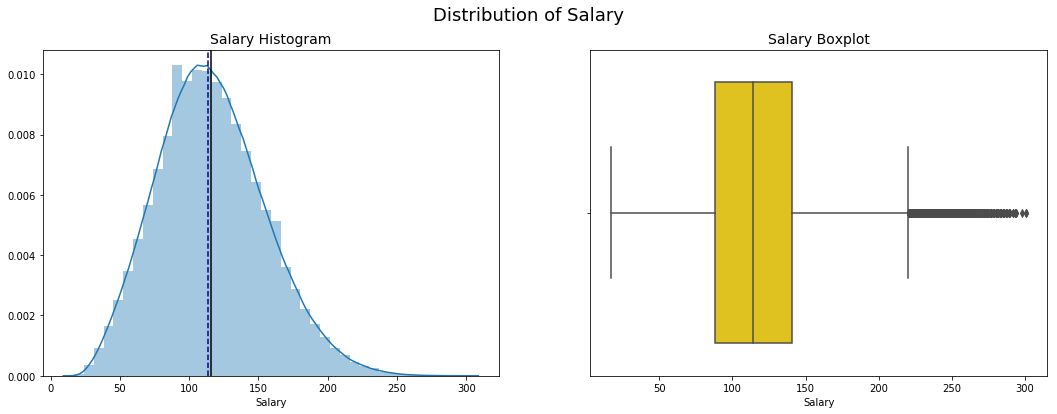

In [127]:
#Visualizing Salary

f, ax = plt.subplots(1,2,figsize=(18,6))
sns.distplot(train_merged['Salary'], ax=ax[0], bins=40, kde=True, norm_hist=True)
ax[0].axvline(np.mean(train_merged['Salary']), color='black')
ax[0].axvline(np.median(train_merged['Salary']), color='darkblue', linestyle='--')
ax[0].set_title('Salary Histogram',fontsize = 14)
sns.boxplot(train_merged['Salary'], ax=ax[1], color='gold')
ax[1].set_title('Salary Boxplot', fontsize = 14)
f.suptitle('Distribution of Salary', fontsize = 18)

print("The Black line in Dist. Plot shows the mean at: ",round(train_merged['Salary'].mean()))
print("The Dotted line in the Dist. Plot shows the median at: ", round(train_merged['Salary'].median()))

#Displaying the Upper & Lower limits of the range of Salary with IQR rule.

stat = train_merged.Salary.describe()
#print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The Inter-quartile Range (IQR) is: ', IQR)
print('The Upper and Lower Bounds for suspected outliers in the Boxplot are {} and {}.'.format(upper, lower))

In [128]:
print(stat)

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: Salary, dtype: float64


We can say that the findings of Skewness and Kurtosis in the previous cell is confirmed as the Salary follows an almost normal distribution with some very little amount of Skew to the right.

There can be observed some outliers in the Boxplot which will have to be analyzed for significance and cleaned if needed.

###Analyzing Outliers from Boxplot and cleaning data further

In [129]:
#Since we have the upper & lower bounds set, we will check the salary values at those places

train_merged.loc[train_merged.Salary< 8.5]

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis,Salary


We have an empty set, meaning no values exist below lower bound

In [130]:
train_merged.loc[train_merged['Salary']>220.5].shape

(7117, 9)

There are 7117 jobs that have salaries above the upper bound

In [131]:
#Displaying the different job types with Salaries above upper bound

train_merged.loc[train_merged['Salary'] > 220.5, 'Job Type'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: Job Type, dtype: int64

In [132]:
#Trying to analyze the roles with salaries above the upper bound  

train_merged[(train_merged['Salary'] > 220.5) & (train_merged['Job Type'] == 'JUNIOR')]

,Job ID,Company ID,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis,Salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


### Displaying Correlation between Features and Target Variable

####Instead of performing manual comparison for every independent variable with Salary, we can define a function that gives a line plot when independent variable is Numerical value and a box plot when independent variable is categorical data

In [0]:
#Defining plotting function

def plot_var(df, var):
  plt.figure(figsize = (14, 6))
  plt.subplot(1, 2, 1)
  
  #if the independent variable is an integer
  if df[var].dtype == 'int64':
    df[var].value_counts().sort_index().plot()
    plt.xticks(rotation = 45)
    plt.xlabel(var)
    plt.ylabel('Counts')
    plt.title('Distribution of {}'.format(var))
    plt.subplot(1, 2, 2)
    
  else:
    #We change variable data type to Categorical and group them by the mean of 
    #Salary in every column
    mean = df.groupby(var)['Salary'].mean()
    df[var] = df[var].astype('category').copy()
    levels = mean.sort_values().index.tolist()
    df[var].cat.reorder_categories(levels, inplace=True)
    df[var].value_counts().plot()
    plt.xticks(rotation = 45)
    plt.xlabel(var)
    plt.ylabel('Counts')
    plt.title('Distribution of {}'.format(var))
    plt.subplot(1, 2, 2)

    if df[var].dtype == 'int64' or var == 'Company ID':
        #plot the mean salary for each category and fill between the 
        #(mean - std, mean + std)
        mean = df.groupby(var)['Salary'].mean()
        std = df.groupby(var)['Salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
        
    else:
        sns.boxplot(x=var, y='Salary', data = df.sort_values('Salary'))
    
    plt.xticks(rotation = 45)
    plt.ylabel('Salaries')
    plt.title('Relationship of Salary with {}'.format(var))
    plt.show()

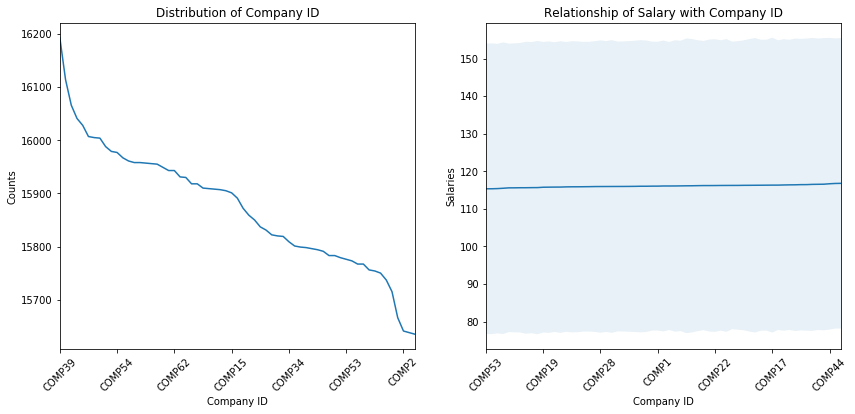

In [134]:
#Correlation between Company ID and Salary
plot_var(train_merged, 'Company ID')

There is no apparant correlation between Company ID and Salaries. This could be because salaries are evenly distributed across the companies and therefore, Company ID is not a good predictor of Salaries in the given dataset 

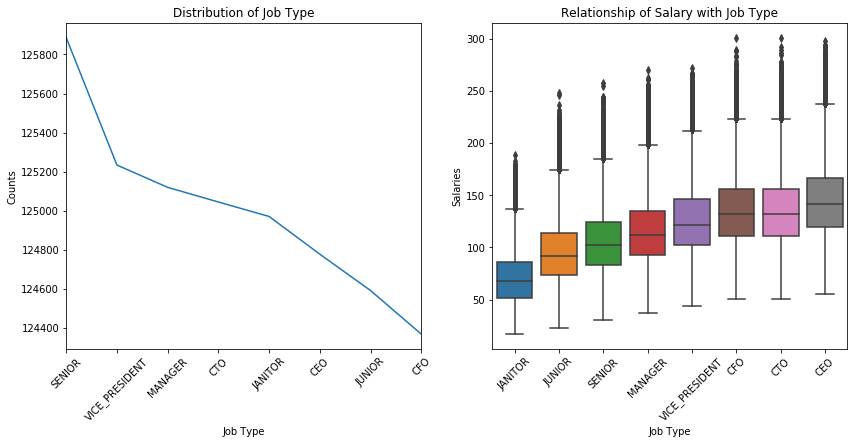

In [135]:
#Correlation between Job Type and Salary
plot_var(train_merged, 'Job Type')

We can observe a positive correlation between the Job Type and Salaries. To validate further, we can observe that Salaries increase from Janitor roles to those of CFO, CTO and CEOs.

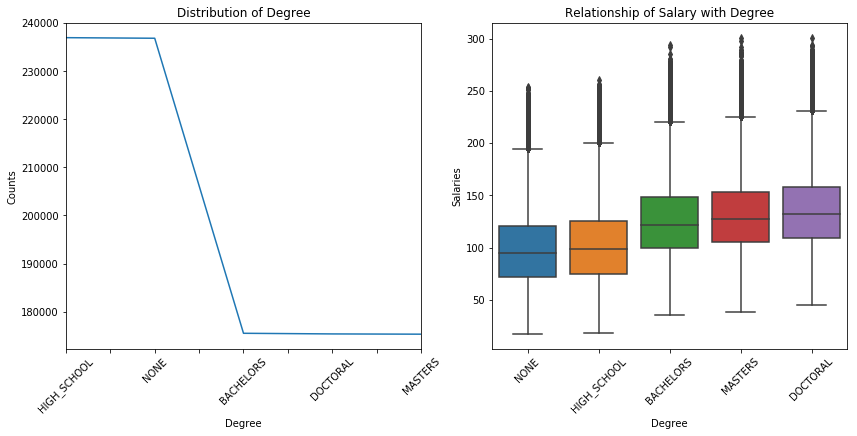

In [136]:
#Correlation between Degree and Salary
plot_var(train_merged, 'Degree')

We see a positive correlation between deree type and salaries. PhD's earn more than high school graduates or those without any degree.

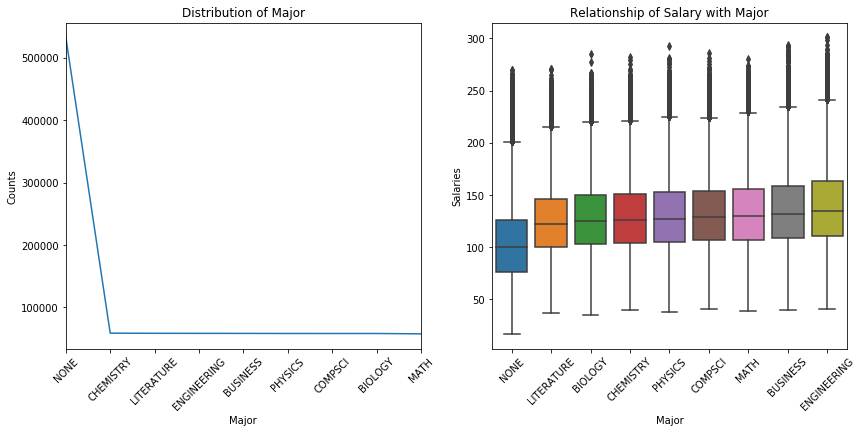

In [137]:
#Correlation between Major and Salary
plot_var(train_merged, 'Major')

Engineering Manjors have shown to earn the highest as compared to others

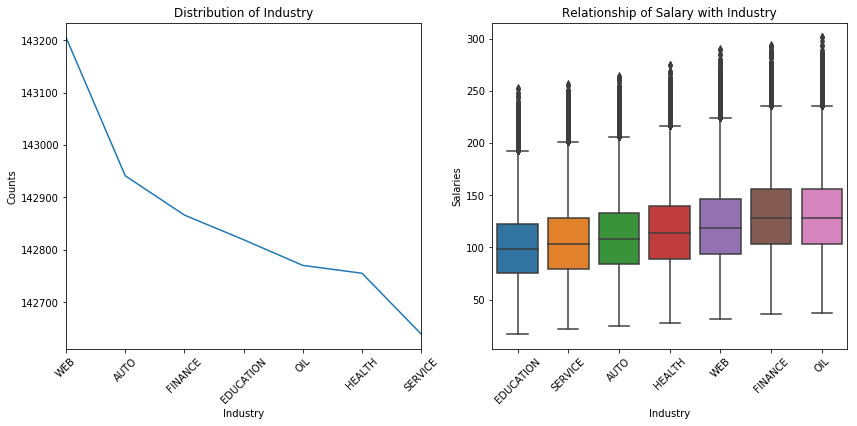

In [138]:
#Correlation between Industry and Salary
plot_var(train_merged, 'Industry')

There is also a positive correlation between industries and salaries. Oil and Gas is the most profitable industry of all

(0, 315.32917172733397)

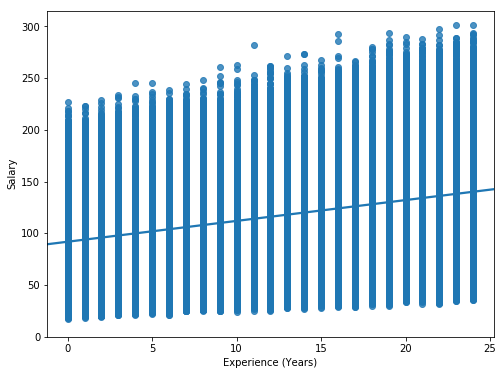

In [139]:
#Correlation between Experience and Salary using Regression Plot

plt.figure(figsize=(8, 6))
sns.regplot(x="Experience (Years)", y="Salary", data = train_merged)
plt.ylim(0,)

We can see a positive correlation between experience and salary, as the lm plot suggests. Out analysis could further be aided by **Residual Plot analysis** of these variables.

*A residual plot shows the spread of its residuals. If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.*

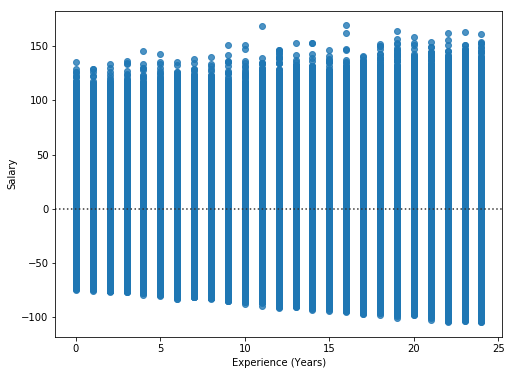

In [140]:
#Residual Plot

plt.figure(figsize=(8, 6))
sns.residplot(train_merged['Experience (Years)'], train_merged['Salary'])
plt.show()

We can observe that variance in Salary figures seems to increase slightly with Experience. However, the data is spread away from its regression line with a weekly positive correlation between Experience and Salary

**We do the same with Miles from Metropolis and Salary variables**

(0, 315.32917172733397)

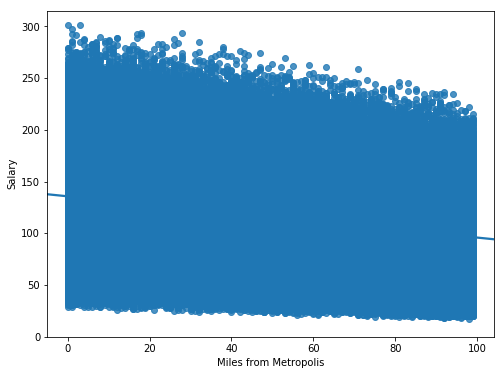

In [141]:
#Correlation between Job Type and Miles from Metro using Regression Plot

plt.figure(figsize=(8, 6))
sns.regplot(x="Miles from Metropolis", y="Salary", data = train_merged)
plt.ylim(0,)

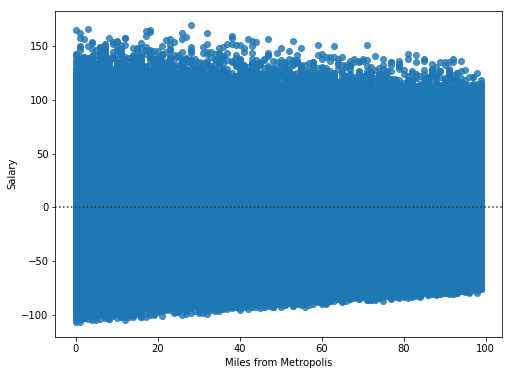

In [142]:
#Residual Plot

plt.figure(figsize=(8, 6))
sns.residplot(train_merged['Miles from Metropolis'], train_merged['Salary'])
plt.show()

We can definitely see a negative correlation between Miles from Metropolis and Salary. This is somewhat understandable as most of the jobs are normally offerred closer to city centre.

**We can also compute if there is a particular Major that earns the most in a certain Industry from our dataset.**


In [143]:
industry_type = train_merged['Industry'].unique()
industry_type

[HEALTH, WEB, AUTO, FINANCE, EDUCATION, OIL, SERVICE]
Categories (7, object): [HEALTH, WEB, AUTO, FINANCE, EDUCATION, OIL, SERVICE]

<Figure size 432x288 with 0 Axes>

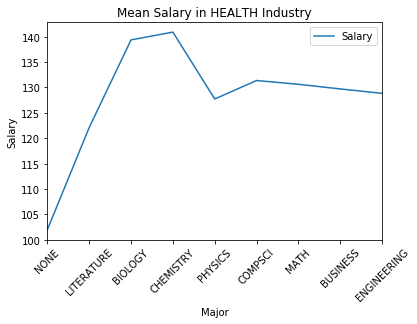

<Figure size 432x288 with 0 Axes>

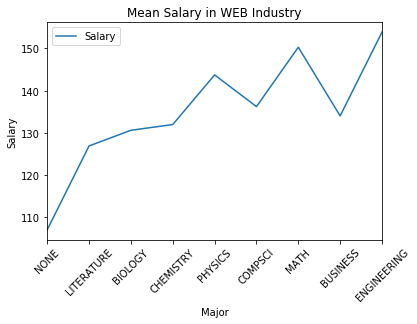

<Figure size 432x288 with 0 Axes>

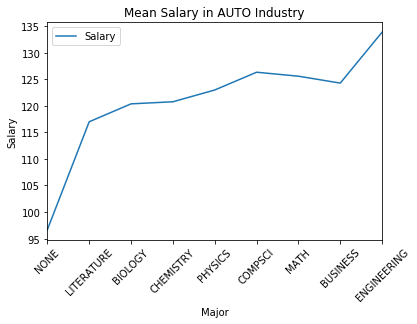

<Figure size 432x288 with 0 Axes>

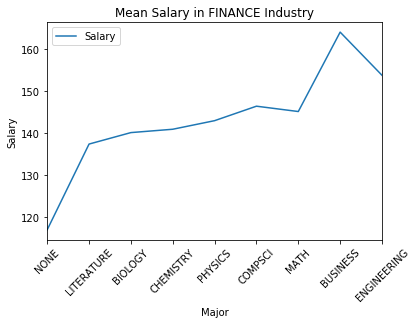

<Figure size 432x288 with 0 Axes>

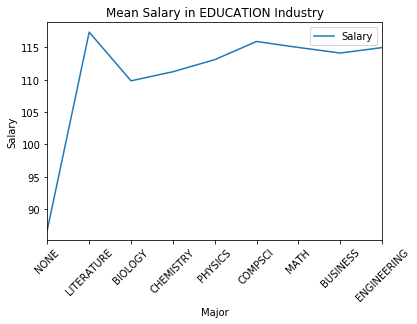

<Figure size 432x288 with 0 Axes>

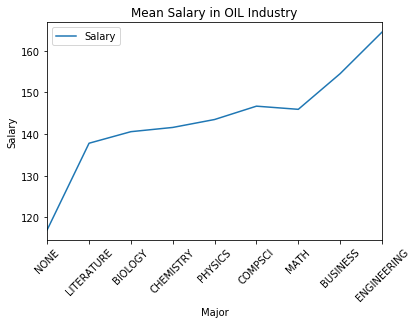

<Figure size 432x288 with 0 Axes>

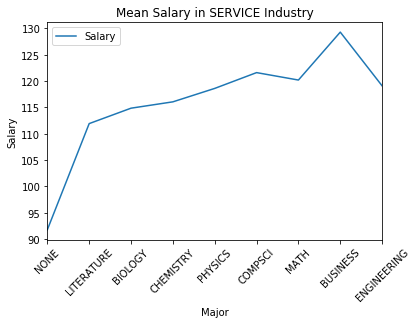

In [144]:
for i  in industry_type:
        plt.figure()
        train_merged[(train_merged['Industry'] == i)][['Major','Salary']].groupby('Major').mean().plot()
        plt.title('Mean Salary in {} Industry'.format(i))
        plt.ylabel('Salary')
        plt.xticks(rotation = 45)
        plt.show()

##EDA Result Presentation - Correlation between all Features

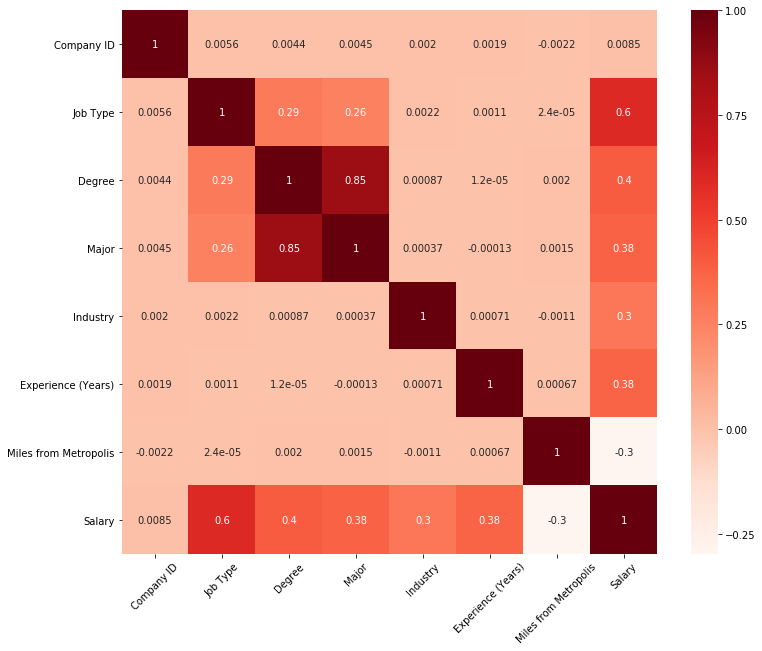

In [145]:
#Performing Correlation Analysis

#Defining Function for Heatmap
def encode_label(df, col):
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = df[df[col] == cat]['Salary'].mean()   
    df[col] = df[col].map(cat_dict)

corr_train = train_merged.copy()

for i in corr_train.columns:
    if corr_train[i].dtype.name=='category':
        encode_label(corr_train,i)
        
#Plotting the actual correlations amongst all features
fig = plt.figure(figsize=(12, 10))
features = ['Company ID', 'Job Type', 'Degree', 'Major', 'Industry', 'Experience (Years)', 'Miles from Metropolis']
sns.heatmap(corr_train[features + ['Salary']].corr(), cmap='Reds', annot=True)
plt.xticks(rotation=45)
plt.show()

### Final Data clean-up to remove outliers and splitting into independent and dependent variables

Earlier, we established that Job ID and Company ID are not good predictors of salaries in our dataset. Also, we were able to identify outliers from our box plot. Hence, before we proceed to build our model it is better to remove them.

In [0]:
#Getting rid of redundant variables from the dataset

train_merged = train_merged.drop('Job ID', axis = 1)

In [0]:
train_merged = train_merged.drop('Company ID', axis = 1)
test_features_df = test_features_df.drop('Job ID', axis = 1)
test_features_df = test_features_df.drop('Company ID', axis = 1)

In [148]:
train_merged.head()

,Job Type,Degree,Major,Industry,Experience (Years),Miles from Metropolis,Salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### One-hot Encoding has mainly been done here to find the feature that has the highest correlation with the Salary.
**This methodology assigns 'dumies' to the categorical data in the form of 0 or 1 showing correlation with a particular variable (or assigns numerical values to categorical data). This will be useful in making a better predictive model** 

In [149]:
#One hot encode categorical data in the dataset

train_merged = pd.get_dummies(train_merged)
train_merged.head()

,Experience (Years),Miles from Metropolis,Salary,Job Type_JANITOR,Job Type_JUNIOR,Job Type_SENIOR,Job Type_MANAGER,Job Type_VICE_PRESIDENT,Job Type_CFO,Job Type_CTO,Job Type_CEO,Degree_NONE,Degree_HIGH_SCHOOL,Degree_BACHELORS,Degree_MASTERS,Degree_DOCTORAL,Major_NONE,Major_LITERATURE,Major_BIOLOGY,Major_CHEMISTRY,Major_PHYSICS,Major_COMPSCI,Major_MATH,Major_BUSINESS,Major_ENGINEERING,Industry_EDUCATION,Industry_SERVICE,Industry_AUTO,Industry_HEALTH,Industry_WEB,Industry_FINANCE,Industry_OIL
0,10,83,130,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,3,73,101,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10,38,137,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,8,17,142,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,8,16,163,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


**Numerical values (dummies) have been assigned to all featues**

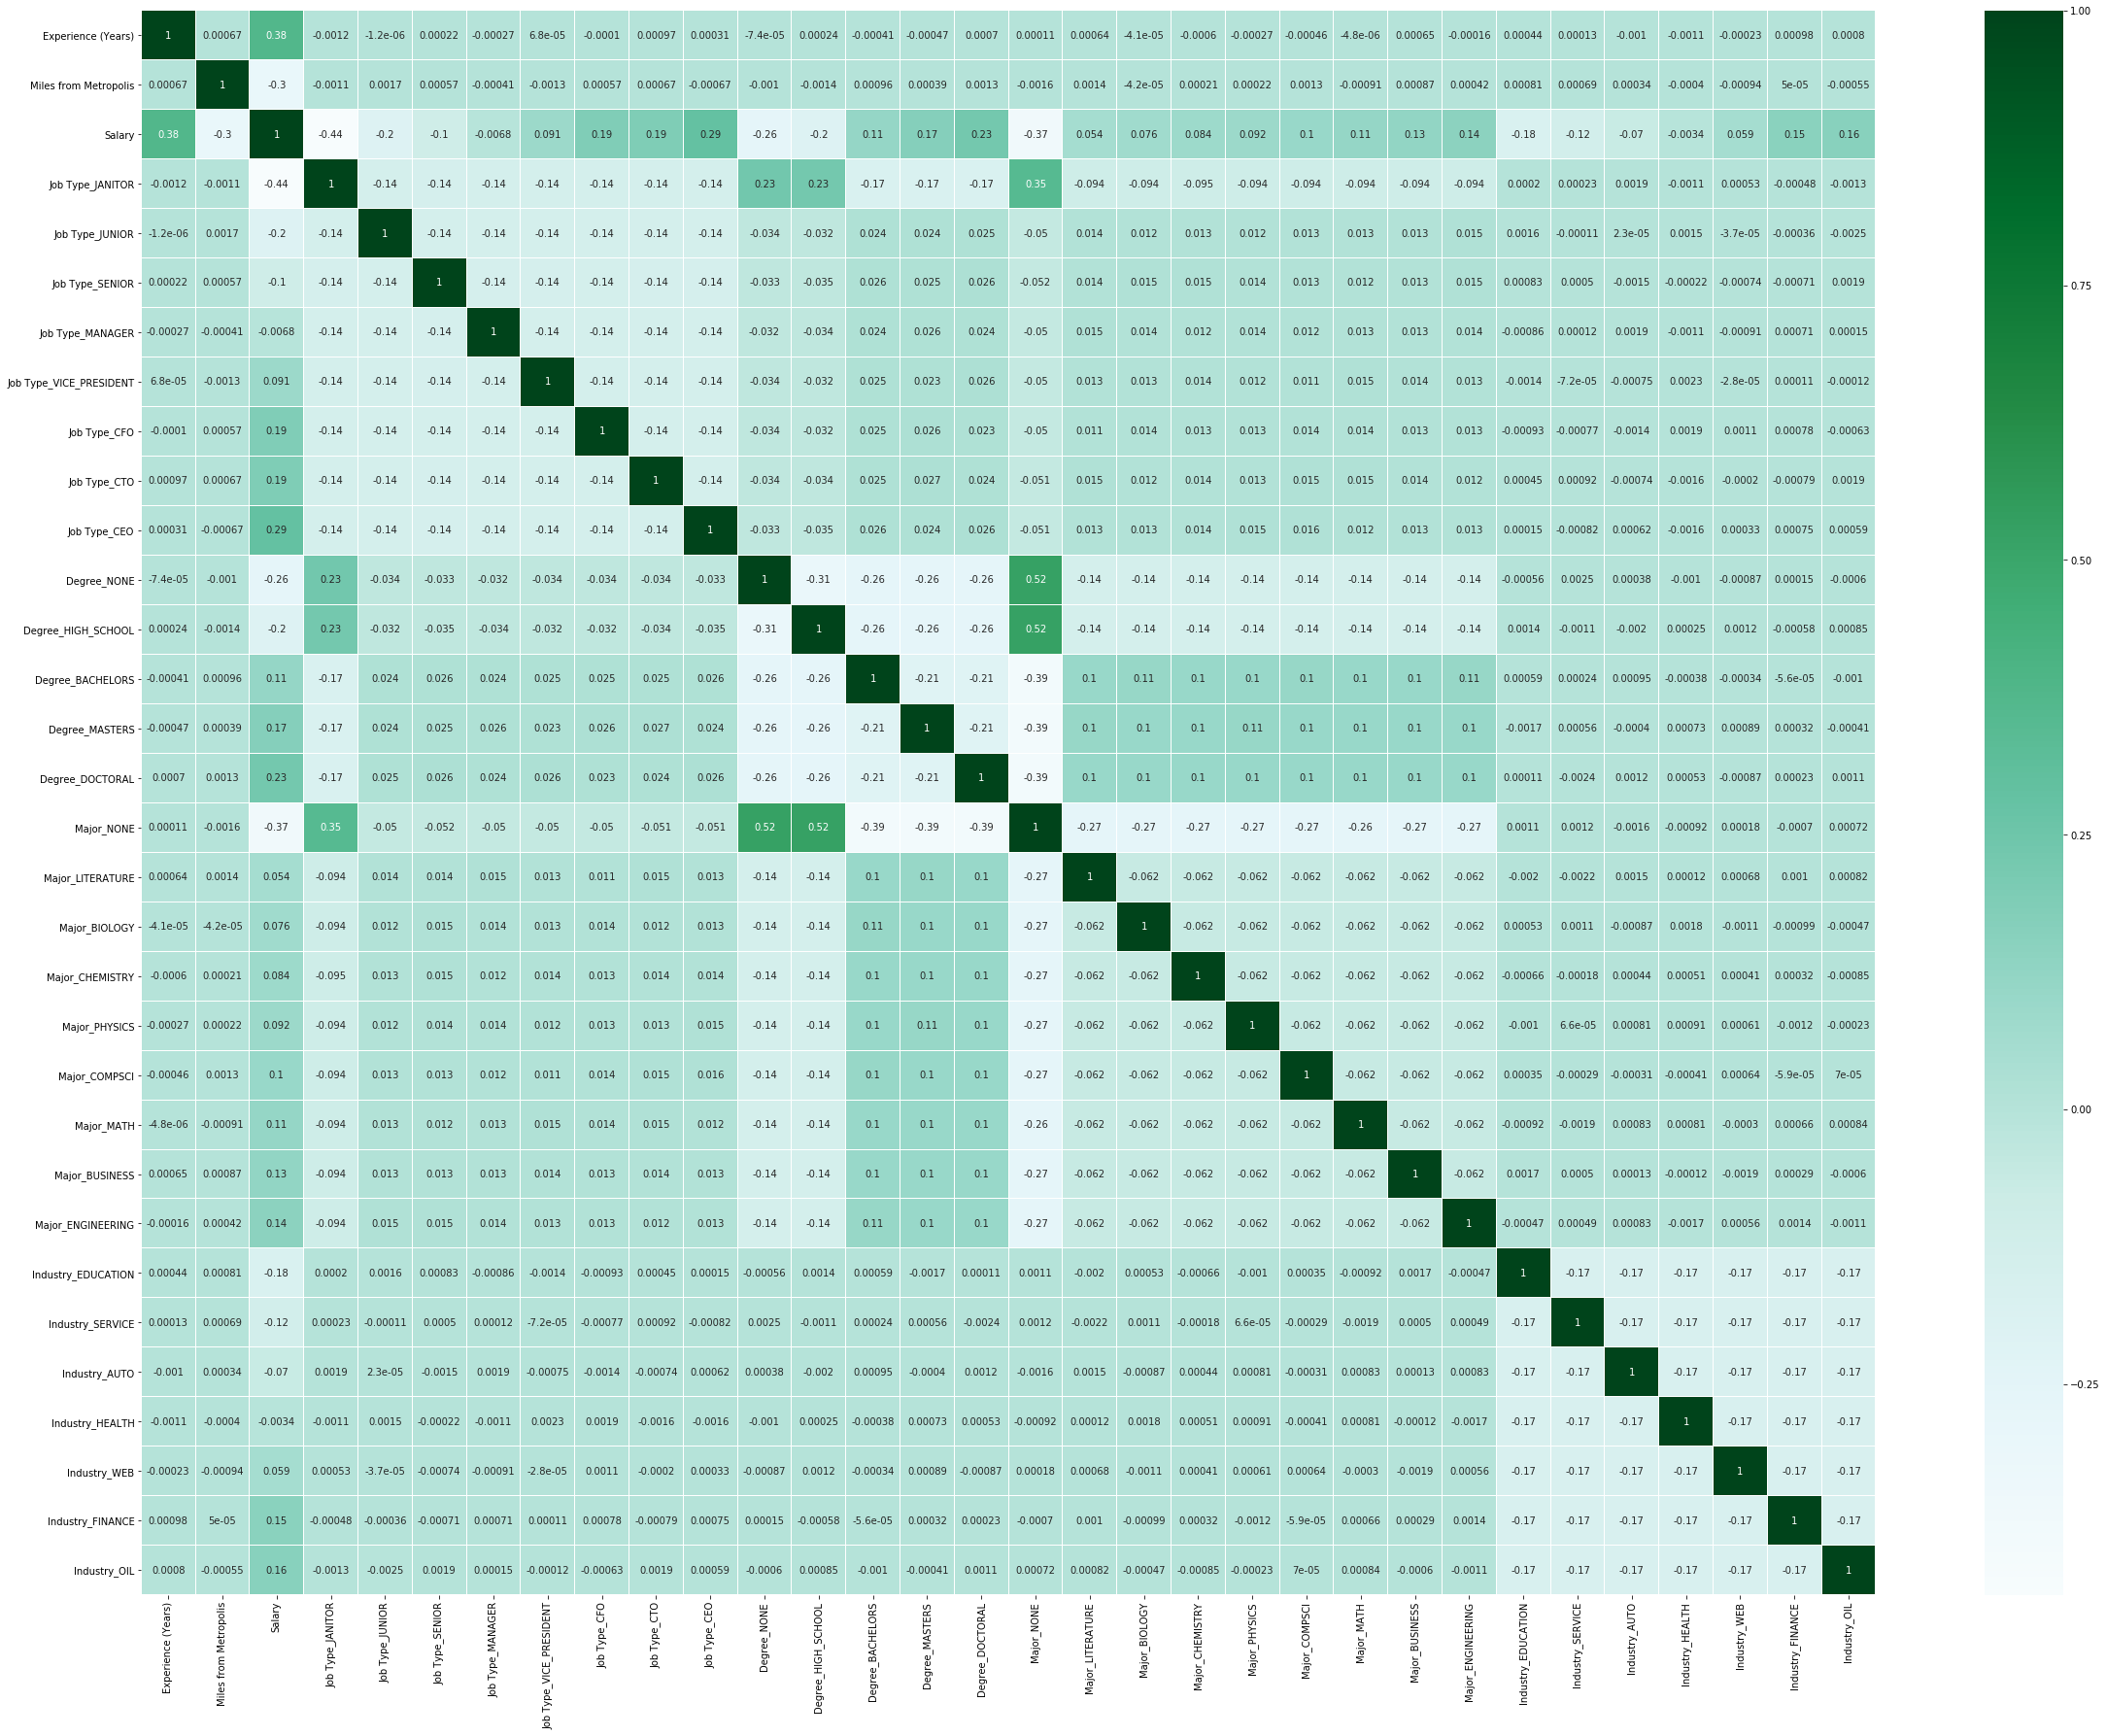

In [150]:
#Correlation between all different features will be presented using confusion matrix
train_merged_corr = train_merged.corr()
plt.subplots(figsize = (40, 30))
sns.heatmap(train_merged_corr, cmap = 'BuGn', linewidth = 0.005, annot = True)

It is very clear that **Experience (Years) has the highest correlation with Salary.** Other job roles like those of **CFO, CTO and CEO** also show high correlation with Salary. The plot also shows that a **Doctorol Degree is correlated with higher salary**

## ---- 5 Establish a baseline ----

In [0]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

Having performed EDA and establishing that this is a regression problem, we know that we are to predict the continuous variable, Salary from the recently cleaned data (Cleared outliers, 1-hot encoded cateogrical data and established correlated variables).

**We will now establish the predictor model by splitting the merged training dataset into training and testing data in a 80:20 ratio**

**Simple Linear Regression** is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (x)</li>
    <li>The response/dependent variable (that we want to predict)(y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

$$
 y: Response \ Variable\\
 x: Predictor \ Variables
$$

 <b>Linear function:</b>
$$
Yhat = a + b  x
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

## Splitting Data into Training and Testing

In [0]:
#Dividing data into attributes and labels

x = train_merged.drop('Salary', axis = 1)
#To avoid model overfitting, which happens if the target parameter 'Salary' is 
#not removed from training data 

y = train_merged['Salary']

In [153]:
#Performing the split (Training - 80%, Testing - 20%)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)

print("Nmber of training samples:",x_train.shape[0])
print("Nmber of test samples :", x_test.shape[0])

Nmber of training samples: 799996
Nmber of test samples : 199999


**Training algorithm using Simple Linear Regression**


In [154]:
#Creating Linear Regressor Object
lr = LinearRegression()

#Fitting model using x and y attributes
lr.fit(x_train, y_train)

#Making Prediction such that y_hat gives an array of Target Value (Salary)
y_hat = lr.predict(x_test)
print("The first 5 predictied salaries: ", y_hat[0:5])


The first 5 predictied salaries:  [125.80952748 166.78939744 122.70796757  43.15618249 179.82411381]


**We now find the coefficients (a and b from the mathematical expression of Linear Regression)**

In [155]:
#Finding intercept 'a' and slope 'b'
print("The Slope is: ", lr.coef_)
print("The Intercept is: ", lr.intercept_)

The Slope is:  [ 2.00808383e+00 -3.99746778e-01  6.74077014e+06  6.74078271e+06
  6.74079273e+06  6.74080267e+06  6.74081256e+06  6.74082276e+06
  6.74082270e+06  6.74083248e+06 -1.86043266e+08 -1.86043262e+08
 -1.86043257e+08 -1.86043252e+08 -1.86043247e+08 -1.35208143e+08
 -1.35208142e+08 -1.35208138e+08 -1.35208137e+08 -1.35208136e+08
 -1.35208134e+08 -1.35208133e+08 -1.35208131e+08 -1.35208128e+08
  2.57291776e+08  2.57291781e+08  2.57291786e+08  2.57291792e+08
  2.57291798e+08  2.57291807e+08  2.57291807e+08]
The Intercept is:  57218911.1671183


In [156]:
#Having established a baseline model, we can predict Salaries in the test set

y_hat=lr.predict(x_test) #Predicting the training data
y_hat

array([125.80952748, 166.78939744, 122.70796757, ..., 101.10361554,
        64.94883978,  59.35238456])

###Evaluating Model Accuracy using Metrics like MSE and R^2

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

Higher R^2 and lower MSE values are desirable

In [157]:
#Evaluation with MSE
mse = mean_squared_error(y_test, y_hat)
print("Mean Squared Error is: ", mse)

#Evaluation with R^2, which is a metric for model prediction accuracy
print('The R-square is: ', lr.score(x,y))

Mean Squared Error is:  385.07135964636467
The R-square is:  0.7435767279756456


In [158]:
#Prediction accuracy using 5-cross validation
Rcross = cross_val_score(lr, x_train, y_train, cv = 5)

print("The k-cross validation accuracy is: ", (Rcross.mean(), Rcross.std()))

The k-cross validation accuracy is:  (0.743360993867132, 0.0008273641880013654)


**A distribution plot is an effective demonstration of how the predicted values of the training data are distributed**

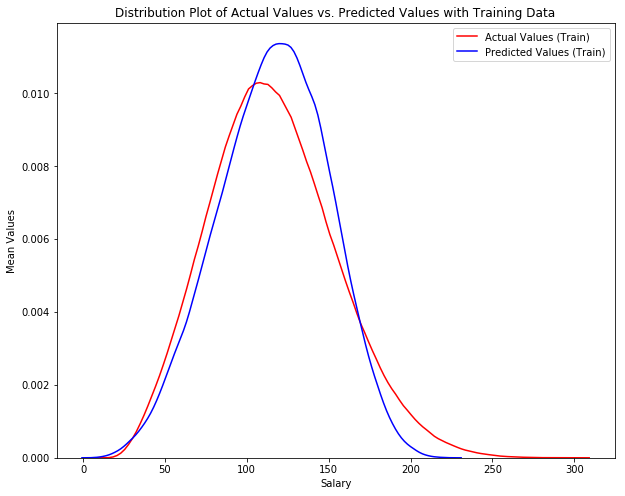

In [159]:
#Defining function for Distribution Plot
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Salary')
    plt.ylabel('Mean Values')
    plt.show()
    plt.close()

#Distribution plot for the 80% train data
Title = 'Distribution Plot of Actual Values vs. Predicted Values with Training Data'
DistributionPlot(y_train, y_hat, "Actual Values (Train)", "Predicted Values (Train)", Title)
  

Plots are nearly the same with the mean of predicted values slightly higher than the actual values

In [160]:
#Distribution plot for the 20% test data
##Predicting the first 5 values
y_hat_test = lr.predict(x_test)
print("First 5 predictios: ", y_hat_test[0:5])

First 5 predictios:  [125.80952748 166.78939744 122.70796757  43.15618249 179.82411381]


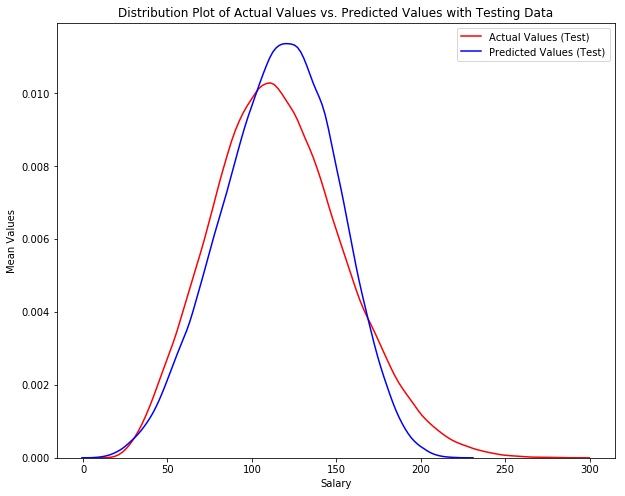

In [161]:
#Distribution plot for the 20% test data

Title = 'Distribution Plot of Actual Values vs. Predicted Values with Testing Data'
DistributionPlot(y_test, y_hat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

Plots are nearly the same with the mean of predicted values slightly higher than the actual values

## ---- 6 Hypothesize solution ----

In [0]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your knowledge 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

**We now have an MSE score of 385 from our baseline model with 74% prediction accuracy. How do we improve this score?** 

We can attempt to improve this score by comparing our baseline model against the following models - 


*   Polynomial Transformation
*   Ridge Regression
*   Random Forest Regressor
*   Gradient Descent




In [163]:
#Validating shapes of train and test sets
print("Feature Training Set Shape: ", x_train.shape)
print("Feature Testing Set Shape: ", x_test.shape)
print("Target Training Set Shape: ", y_train.shape)
print("Target Testing Set Shape: ", y_test.shape)

Feature Training Set Shape:  (799996, 31)
Feature Testing Set Shape:  (199999, 31)
Target Training Set Shape:  (799996,)
Target Testing Set Shape:  (199999,)


###Polynomial Transformation

Applying 2nd order polynomial

In [164]:
#Creating object for polynomial transformation
p = PolynomialFeatures(2)

#Fitting object to training/testing data
x_train_p = p.fit_transform(x_train)
x_test_p = p.fit_transform(x_test)
print(p)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')


In [165]:
#Applying Polynomial regression on the training data
poly = LinearRegression()
poly.fit(x_train_p, y_train)

#Predictng Salaries after applying Polynomial Regression
y_hat_ptrain = poly.predict(x_train_p)
print("First 5 salary Predictions on training data: ", y_hat_ptrain[0:5])

First 5 salary Predictions on training data:  [126.36635198 114.51547601 113.4713743   94.48681714 139.15922525]


First 5 Predicted Training Values:  [126.36635198 114.51547601 113.4713743   94.48681714 139.15922525]
First 5 Actual Training Values:  [141 140 113 101 148]


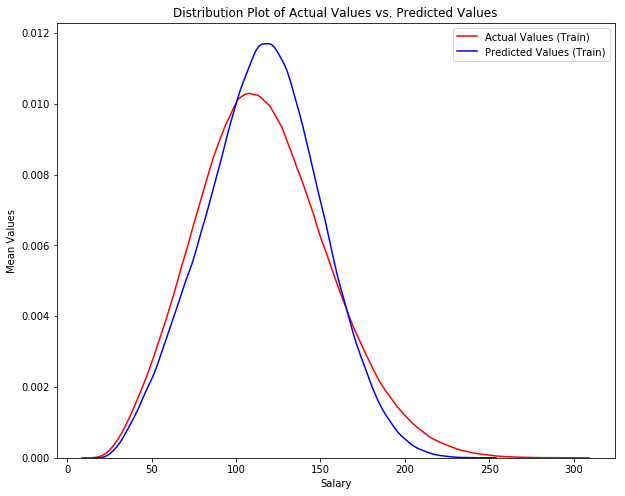

In [166]:
print("First 5 Predicted Training Values: ", y_hat_ptrain[0:5])
print("First 5 Actual Training Values: ", y_train[0:5].values)

#Comparing actual and predicted values with distribution plot
Title = 'Distribution Plot of Actual Values vs. Predicted Values'
DistributionPlot(y_train, y_hat_ptrain, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [167]:
#Making predictions on the test set
y_hat_ptest = poly.predict(x_test_p)
print("First 5 salary Predictions on training data: ", y_hat_ptest[0:5])

First 5 salary Predictions on training data:  [115.2301067  175.90430155 132.51331069  49.38111665 176.41949155]


First 5 Predicted Test Values:  [115.2301067  175.90430155 132.51331069  49.38111665 176.41949155]
First 5 Actual Test Values:  [124 173 139  40 226]


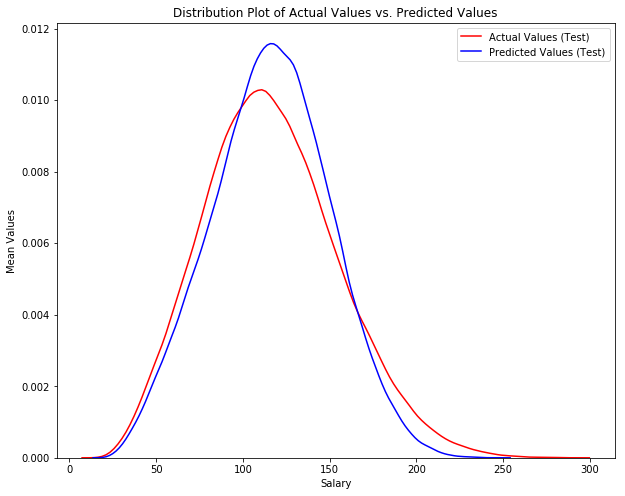

In [168]:
print("First 5 Predicted Test Values: ", y_hat_ptest[0:5])
print("First 5 Actual Test Values: ", y_test[0:5].values)

#Comparing actual and predicted values with distribution plot
Title = 'Distribution Plot of Actual Values vs. Predicted Values'
DistributionPlot(y_test, y_hat_ptest, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [169]:
#Evaluation with MSE
print("Training Data MSE: ", mean_squared_error(y_train, y_hat_ptrain))
print("Test Data MSE: ", mean_squared_error(y_test, y_hat_ptest))

#Evaluation with R^2, which is a metric for model prediction accuracy
print('Training Data R-square: ', poly.score(x_train_p, y_train))
print('Test Data R-square: ', poly.score(x_test_p, y_test))




Training Data MSE:  353.84514605348653
Test Data MSE:  353.3492554139643
Training Data R-square:  0.7636710605174164
Test Data R-square:  0.7653794997619126


###The MSE has considerably improved after using the Polynomial Transformation

###Ridge Regressor

In [170]:
#Creating Ridge regressor object
rg = Ridge(alpha = 1.0)
rg.fit(x_train_p, y_train)
rg.score(x_test_p, y_test)

0.7653794231237154

First 5 Salary Predictions on training data:  [126.36555913 114.51484362 113.47202909  94.48704836 139.15902883]
First 5 Actual Training Values:  [141 140 113 101 148]


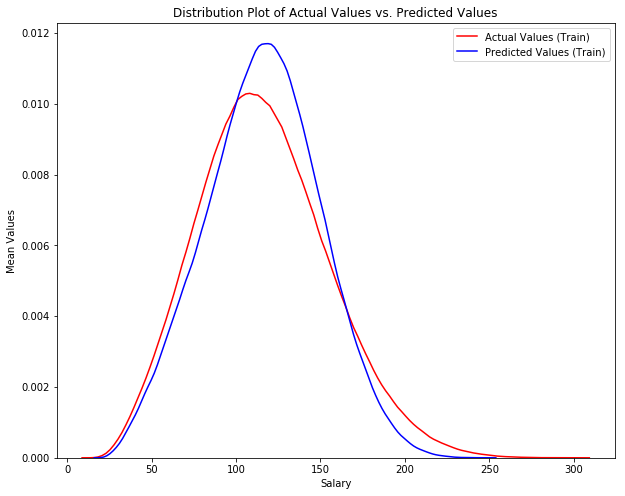

In [171]:
#Predictng Training Salaries after applying Ridge Regression
y_hat_rtrain = rg.predict(x_train_p)
print("First 5 Salary Predictions on training data: ", y_hat_rtrain[0:5])
print("First 5 Actual Training Values: ", y_train[0:5].values)

#Comparing actual and predicted values with distribution plot
Title = 'Distribution Plot of Actual Values vs. Predicted Values'
DistributionPlot(y_train, y_hat_rtrain, "Actual Values (Train)", "Predicted Values (Train)", Title)

First 5 Salary Predictions on test data:  [115.22902546 175.90358526 132.51192034  49.38190463 176.41909344]
First 5 Actual Test Values:  [124 173 139  40 226]


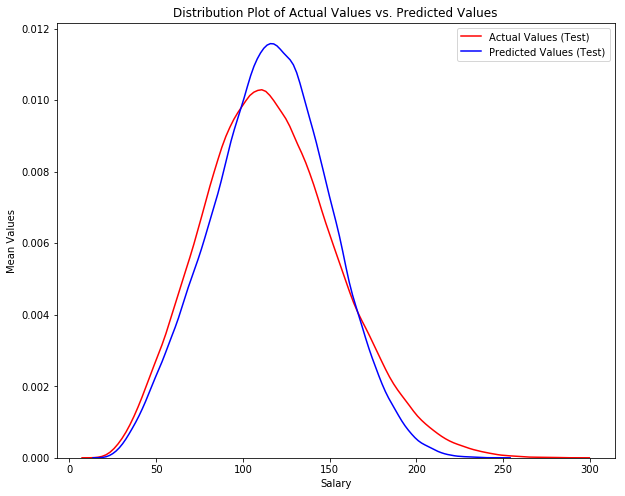

In [172]:
#Predictng Test Salaries after applying Ridge Regression
y_hat_rtest = rg.predict(x_test_p)
print("First 5 Salary Predictions on test data: ", y_hat_rtest[0:5])
print("First 5 Actual Test Values: ", y_test[0:5].values)

#Comparing actual and predicted values with distribution plot
Title = 'Distribution Plot of Actual Values vs. Predicted Values'
DistributionPlot(y_test, y_hat_rtest, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [173]:
#Evaluation with MSE
print("Training Data MSE: ", mean_squared_error(y_train, y_hat_rtrain))
print("Test Data MSE: ", mean_squared_error(y_test, y_hat_rtest))

#Evaluation with R^2, which is a metric for model prediction accuracy
print('Training Data R-square: ', poly.score(x_train_p, y_train))
print('Test Data R-square: ', poly.score(x_test_p, y_test))

Training Data MSE:  353.8451463131643
Test Data MSE:  353.34937083461114
Training Data R-square:  0.7636710605174164
Test Data R-square:  0.7653794997619126


Thus, we see very slight improvement with Ridge as compared to Polynomial Regressor

###Random Forest Regressor

In [174]:
#Creating a Random Forest Object
rf = RandomForestRegressor(n_estimators = 60, max_depth = 25, 
                           min_samples_split = 20, n_jobs = 2, 
                           max_features = 30)
print(rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=30, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=2,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)


In [175]:
#Fitting the object to training data
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.7506764177352365

In [176]:
#Making Predictions on test data
y_hat_testrf = rf.predict(x_test)
print("First 5 Predictions on test set: ", y_hat_testrf[0:5])

First 5 Predictions on test set:  [113.368353   171.82906148 131.85664107  50.93240418 176.17458332]


In [177]:
#Making Predictions on training data
y_hat_trainrf = rf.predict(x_train)
print("First 5 Predictions on test set: ", y_hat_trainrf[0:5])

First 5 Predictions on test set:  [132.03565079 115.03331182 108.7173707   92.82971544 139.03324377]


In [178]:
#Evaluation with MSE
print("Test Data MSE: ", mean_squared_error(y_test, y_hat_testrf))

#Evaluation with R^2, which is a metric for model prediction accuracy
print('Test Data R-square: ', rf.score(x_test, y_test))

Test Data MSE:  375.49277263067955
Test Data R-square:  0.7506764177352365


**While the MSE obtained with Random Forest is better than our Baseline Model, the Polynomial Regression clearly scores higher on both MSE and R-square**

###Gradient Descent Algorithm

In [0]:
#Creating Gradient Boosting Regressor object
gd = GradientBoostingRegressor(n_estimators = 60, max_depth = 5,
                              loss = 'ls', verbose = 5)

In [180]:
#Fitting object to data
gd.fit(x_train, y_train)
gd.score(x_test, y_test)

      Iter       Train Loss   Remaining Time 
         1        1349.7521            2.75m
         2        1228.6582            2.79m
         3        1128.6677            2.68m
         4        1044.5726            2.60m
         5         973.9931            2.54m
         6         914.4354            2.49m
         7         862.1228            2.44m
         8         814.5300            2.41m
         9         773.2816            2.37m
        10         736.6420            2.32m
        11         703.4862            2.28m
        12         673.0132            2.23m
        13         646.8581            2.21m
        14         623.7454            2.15m
        15         602.6567            2.11m
        16         582.9475            2.07m
        17         563.9571            2.02m
        18         547.9262            1.98m
        19         534.0623            1.94m
        20         521.0696            1.91m
        21         508.5106            1.88m
        2

0.7530160539954764

In [181]:
#Making Predictions and calculating MSE
gd_pred = gd.predict(x_test)
mean_squared_error(gd_pred, y_test)

371.96917290407265

Thus. we have a **MSE** from **Gradient Descent** of **372** and an **R^2** of **76%**
While this is better than the baseline model, it still isn't better than the **Polynomial Regressor**

# Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

## Steps 7 - 9 have been completed in previous steps 

### ---- 7 Engineer features  ----

In [0]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [0]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [0]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [185]:
#select the model with the lowest error as your "prodcuction" model

print("MSE for Linear Regression: ", mse.round())
print("MSE for Polynomial Regressor: ", mean_squared_error(y_test, y_hat_ptest).round())
print("MSE for Ridge Regressor: ", mean_squared_error(y_train, y_hat_rtrain).round())
print("MSE for Random Forest: ", mean_squared_error(y_test, y_hat_testrf).round())

MSE for Linear Regression:  385.0
MSE for Polynomial Regressor:  353.0
MSE for Ridge Regressor:  354.0
MSE for Random Forest:  375.0


Thus, the ideal model for this dataset would be **Polynomial Regressor**

# Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [0]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

Now that we have built a few models and selected the best one, what happens once we are given new data with no Salary values. For such a data to be input into the model, we need to create a Data Pipeline that will automate Polynomial Regression   

In [188]:
#Pipeline

input = [('scale', StandardScaler()), ('transformation', PolynomialFeatures(include_bias = False)),
         ('model', LinearRegression())] #We do not need a bias column where all polynomial powers are 0
pipe = Pipeline(input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('transformation',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [0]:
#Fit Pipeline to data
poly_model = pipe.fit(x,y)

In [191]:
#Predicting test data
y_hat_pipe = pipe.predict(x)
y_hat_pipe[0:5]

array([127.02734375, 116.52734375, 135.11328125, 121.00390625,
       142.67578125])

In [193]:
#File with predicted salary values
filename = 'Salary_Prediction_PolynomialModel.csv'
joblib.dump(poly_model, filename)

['Salary_Prediction_PolynomialModel.csv']

**We can test our model by loading it to a variable and using it as required**

In [194]:
#Load Model
load_model = joblib.load(filename)

#Model Result
result = load_model.score(x_test, y_test)
print(result)

0.7655196527675322


### ---- 12 Deploy solution ----

In [0]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

**We can now test our model on unseen data**

In [200]:
test_features_df = pd.DataFrame(test_features_df)

#Columns with Categorical data need to be converted to 'category' data type
#This is so it may contain finite set of text values

test_features_df[['Job Type', 'Degree', 
                     'Major', 'Industry']] = test_features_df[['Job Type', 
                                                           'Degree', 'Major', 'Industry']].astype('category')
print(test_features_df.dtypes) 

#One-hot encoder
test_features_df = pd.get_dummies(test_features_df)

test_features_df.head()

Job Type                 category
Degree                   category
Major                    category
Industry                 category
Experience (Years)          int64
Miles from Metropolis       int64
dtype: object


,Experience (Years),Miles from Metropolis,Job Type_CEO,Job Type_CFO,Job Type_CTO,Job Type_JANITOR,Job Type_JUNIOR,Job Type_MANAGER,Job Type_SENIOR,Job Type_VICE_PRESIDENT,Degree_BACHELORS,Degree_DOCTORAL,Degree_HIGH_SCHOOL,Degree_MASTERS,Degree_NONE,Major_BIOLOGY,Major_BUSINESS,Major_CHEMISTRY,Major_COMPSCI,Major_ENGINEERING,Major_LITERATURE,Major_MATH,Major_NONE,Major_PHYSICS,Industry_AUTO,Industry_EDUCATION,Industry_FINANCE,Industry_HEALTH,Industry_OIL,Industry_SERVICE,Industry_WEB
0,22,73,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,20,47,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,17,9,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,14,96,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,10,44,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [201]:
#Checking for null values
test_features_df.isnull().sum()

Experience (Years)         0
Miles from Metropolis      0
Job Type_CEO               0
Job Type_CFO               0
Job Type_CTO               0
Job Type_JANITOR           0
Job Type_JUNIOR            0
Job Type_MANAGER           0
Job Type_SENIOR            0
Job Type_VICE_PRESIDENT    0
Degree_BACHELORS           0
Degree_DOCTORAL            0
Degree_HIGH_SCHOOL         0
Degree_MASTERS             0
Degree_NONE                0
Major_BIOLOGY              0
Major_BUSINESS             0
Major_CHEMISTRY            0
Major_COMPSCI              0
Major_ENGINEERING          0
Major_LITERATURE           0
Major_MATH                 0
Major_NONE                 0
Major_PHYSICS              0
Industry_AUTO              0
Industry_EDUCATION         0
Industry_FINANCE           0
Industry_HEALTH            0
Industry_OIL               0
Industry_SERVICE           0
Industry_WEB               0
dtype: int64

**The now cleaned test data can be used to predict salaries by linear regression.**
For the sake of convenience, this same test data will be used as an unknown dataset with no Salary values

In [202]:
predictions = load_model.predict(test_features_df)
predictions[0:5]

array([143.0703125 , 139.78125   , 135.77734375, 124.8828125 ,
       118.44140625])

**Plotting 'feature importance'**

feature importance plotting...
Experience (Years)         0.204500
Miles from Metropolis      0.280167
Job Type_CEO               0.020409
Job Type_CFO               0.018950
Job Type_CTO               0.020511
Job Type_JANITOR           0.009144
Job Type_JUNIOR            0.020119
Job Type_MANAGER           0.018553
Job Type_SENIOR            0.020472
Job Type_VICE_PRESIDENT    0.020528
Degree_BACHELORS           0.018250
Degree_DOCTORAL            0.015738
Degree_HIGH_SCHOOL         0.014217
Degree_MASTERS             0.017070
Degree_NONE                0.014469
Major_BIOLOGY              0.018029
Major_BUSINESS             0.017051
Major_CHEMISTRY            0.017056
Major_COMPSCI              0.016302
Major_ENGINEERING          0.017046
Major_LITERATURE           0.018154
Major_MATH                 0.017162
Major_NONE                 0.016114
Major_PHYSICS              0.016739
Industry_AUTO              0.019084
Industry_EDUCATION         0.018030
Industry_FINANCE           0.0188

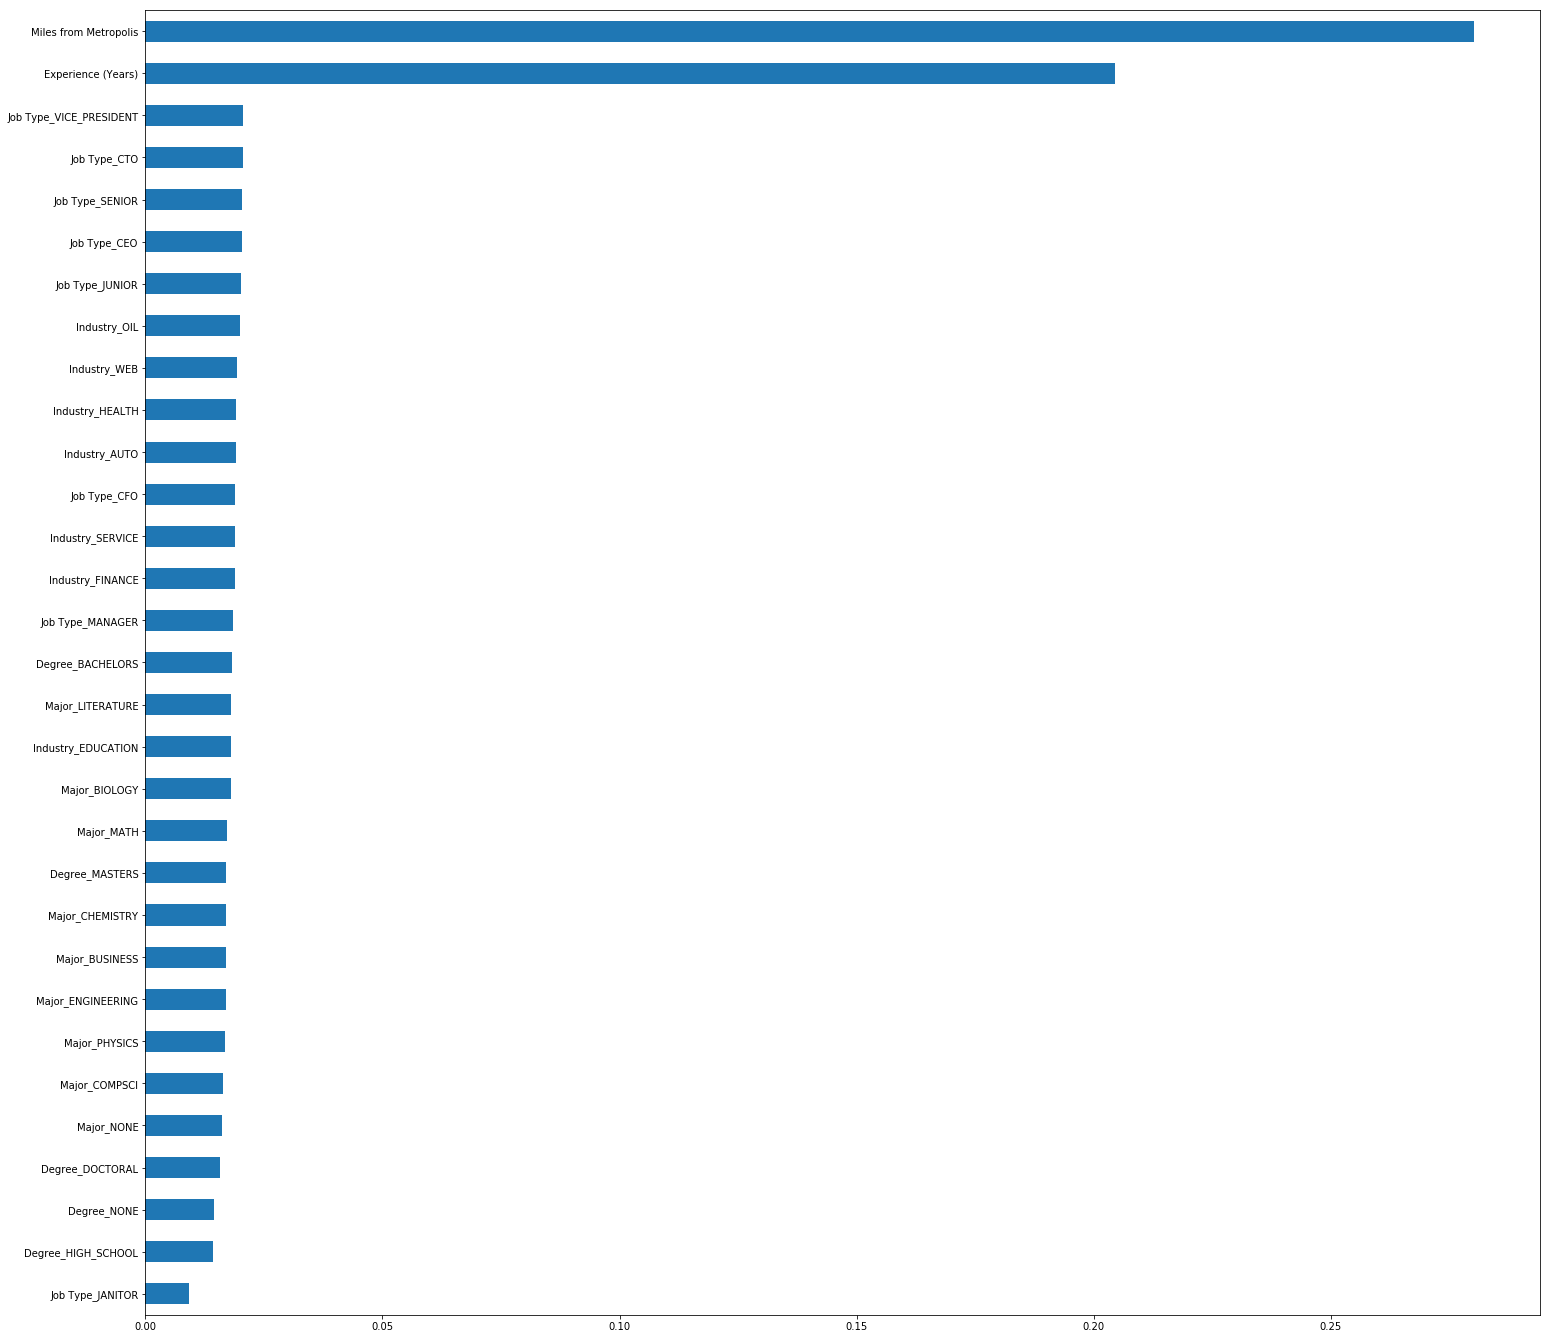

In [209]:
target = train_salaries_df['Salary']

print("feature importance plotting...")
rf.fit(test_features_df, target)
feature_importances = pd.Series(rf.feature_importances_, index=test_features_df.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(25,24))

The developed mathematical model suggests that Miles from Metropolis and Experience (Years) are the most important features

##Summary

To summarize, the application of a **2nd Order Polynomial Transformation** on a **Linear Regression Model** gave the least **MSE** of **353** and most **accuracy** of **76%**. This model can provide the most accurate results in futute when supplied with information on *Experience (Years), Miles from Metropolis, Job Type, Degree and Major*

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data